<a href="https://colab.research.google.com/github/darkknightraj/redme.me/blob/main/forecasting_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

sns.set(rc={'figure.figsize':(12,8)})

In [10]:
data = pd.read_csv('/content/AirPassengers.csv',parse_dates=['Month'])

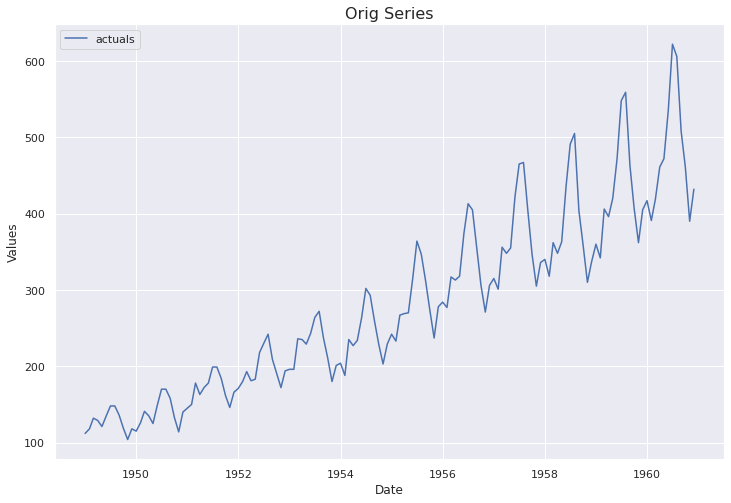

In [11]:
f = Forecaster(y=data['#Passengers'],current_dates=data['Month'])
f.plot()
plt.title('Orig Series',size=16)
plt.show()

In [12]:
f

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    N_actuals=144
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

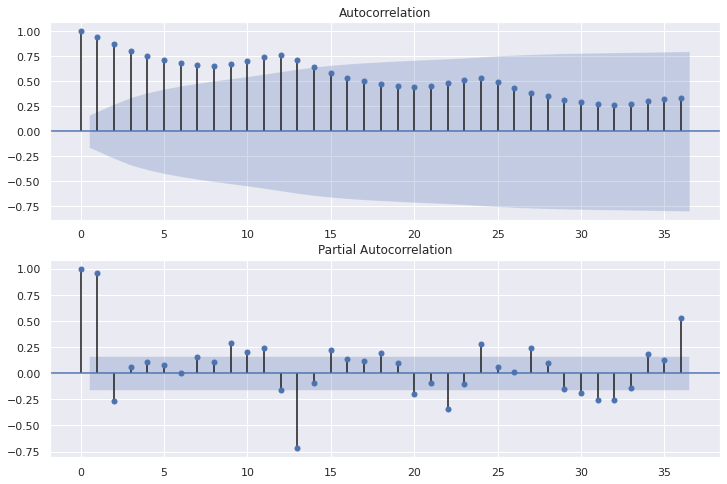

In [13]:
figs, axs = plt.subplots(2, 1)
f.plot_acf(ax=axs[0],lags=36)
f.plot_pacf(ax=axs[1],lags=36)
plt.show()

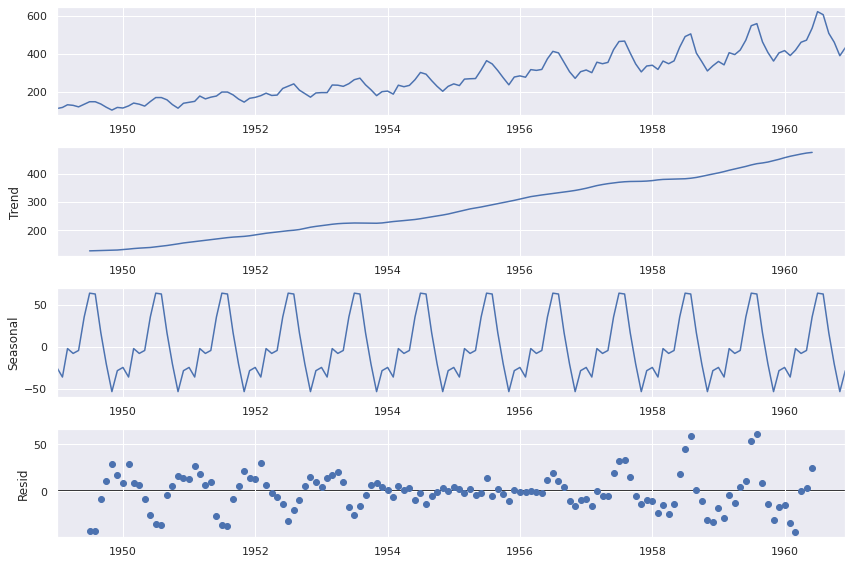

In [14]:
f.seasonal_decompose().plot()
plt.show()

In [15]:
critical_pval = 0.05
print('-'*100)
print('Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

----------------------------------------------------------------------------------------------------
Augmented Dickey-Fuller results:
the test-stat value is: 0.82
the p-value is 0.9919
the series is not stationary
----------------------------------------------------------------------------------------------------


In [16]:
f.set_test_length(12)
f.generate_future_dates(12)

In [17]:
f.set_estimator('lstm')
f.manual_forecast(call_me='lstm_default')

5/5 [==============================] - 2s 4ms/step - loss: 0.3364


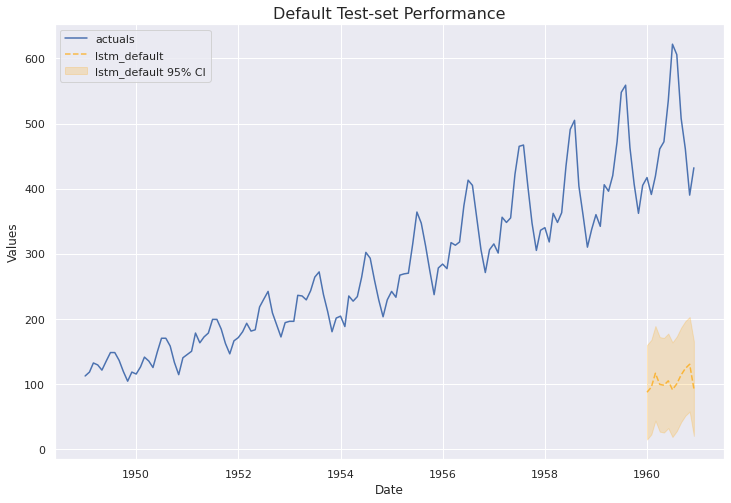

In [18]:
f.plot_test_set(ci=True)
plt.title('Default Test-set Performance',size=16)
plt.show()